<h1>Benchmark de modèles pour l'expertise forecasting</h1>

<p>L'objectif est d'effectuer un benchmark du maximum de modèles afin de pourvoir alimenter le nautilus en données et permettre aux datascientists de l'utiliser pour choisir leurs modèles. Pour cela nous allons utiliser les données provenant d'une compétion Kaggle ayant pour objectif de prédire le future traffic d'une page Wikipedia. Nous allons effectuer la même préparation des données pour tout les modèles et les tester sur ces données.</p>
<p>Kaggle https://www.kaggle.com/c/web-traffic-time-series-forecasting</p>
<p>Nautilus https://artefactory.github.io/nautilus_forecasting/core.where_to_start/index.html</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Exploration des données</h2>

<p>La compétition Kaggle nous propose 6 fichiers csv qui contiennent les visites quotidiennes de 145000 pages wikipedia.</p>

In [3]:
key_1 = pd.read_csv('../Data/key_1.csv')
key_2 = pd.read_csv('../Data/key_2.csv')
sample_submission_1 = pd.read_csv('../Data/sample_submission_1.csv')
sample_submission_2 = pd.read_csv('../Data/sample_submission_2.csv')
train_1 = pd.read_csv('../Data/train_1.csv')
train_2 = pd.read_csv('../Data/train_2.csv')

"key_2 = pd.read_csv('../Data/key_2.csv')\nsample_submission_1 = pd.read_csv('../Data/sample_submission_1.csv')\nsample_submission_2 = pd.read_csv('../Data/sample_submission_2.csv')\ntrain_1 = pd.read_csv('../Data/train_1.csv')\ntrain_2 = pd.read_csv('../Data/train_2.csv')"

In [3]:
print("key_1 " + str(key_1.shape))
print(key_1.head())
print("\nkey_2 " + str(key_2.shape))
print(key_2.head())
print("\nsample_submission_1 " + str(sample_submission_1.shape))
print(sample_submission_1.head())
print("\nsample_submission_2 " + str(sample_submission_2.shape))
print(sample_submission_2.head())
print("\ntrain_1 " + str(train_1.shape))
print(train_1.iloc[:,0:3].head())
print("\ntrain_2 " + str(train_2.shape))
print(train_2.iloc[:,0:3].head())

key_1 (8703780, 2)
                                                Page            Id
0  !vote_en.wikipedia.org_all-access_all-agents_2...  bf4edcf969af
1  !vote_en.wikipedia.org_all-access_all-agents_2...  929ed2bf52b9
2  !vote_en.wikipedia.org_all-access_all-agents_2...  ff29d0f51d5c
3  !vote_en.wikipedia.org_all-access_all-agents_2...  e98873359be6
4  !vote_en.wikipedia.org_all-access_all-agents_2...  fa012434263a

key_2 (8993906, 2)
                                                Page            Id
0  007_スペクター_ja.wikipedia.org_all-access_all-agen...  0b293039387a
1  007_スペクター_ja.wikipedia.org_all-access_all-agen...  7114389dd824
2  007_スペクター_ja.wikipedia.org_all-access_all-agen...  057b02ff1f09
3  007_スペクター_ja.wikipedia.org_all-access_all-agen...  bd2aca21caa3
4  007_スペクター_ja.wikipedia.org_all-access_all-agen...  c0effb42cdd5

sample_submission_1 (8703780, 2)
             Id  Visits
0  bf4edcf969af       0
1  929ed2bf52b9       0
2  ff29d0f51d5c       0
3  e98873359be6       0
4  

<p>Les fichiers train contiennent le nombre de visite quotidienne pour chaque page. Le fichier key permet de faire le lien entre les nomes des page et les identifiants qui leurs sont donneés et qui sont utilisés pour uploader nos prédictions sur Kaggle. Les fichiers sample_submission sont eux des exemples de prédictions à soumettre sur Kaggle. Il y a deux versions dechaque fichiers car la compétion se faisaient en deux étapes: une première où on prédit les visites passé jusqu'au 12 septembre 2017 et la deuxième où on prédit les visites futurs 13 septembre 2017 jusqu'au 13 Novembre 2017.</p>
<p>Nous allons travailler uniquement avec le fichier train_1</p>

In [2]:
train_1 = pd.read_csv('../Data/train_1.csv')
train_1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [3]:
train_1_reduce = train_1[0:10]
train_1_reduce = train_1_reduce.fillna(0)
train_1_reduce = train_1_reduce.set_index('Page')
train_1_reduce = train_1_reduce.T.rename_axis('Dates')
train_1_reduce.head()

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider
Dates,,,,,,,,,,
2015-07-01,18.0,11.0,1.0,35.0,0.0,12.0,0.0,118.0,5.0,6.0
2015-07-02,11.0,14.0,0.0,13.0,0.0,7.0,0.0,26.0,23.0,3.0
2015-07-03,5.0,15.0,1.0,10.0,0.0,4.0,0.0,30.0,14.0,5.0
2015-07-04,13.0,18.0,1.0,94.0,0.0,5.0,0.0,24.0,12.0,12.0
2015-07-05,14.0,11.0,0.0,4.0,0.0,20.0,0.0,29.0,9.0,6.0


count    550.000000
mean      22.327273
std        9.291190
min        2.000000
25%       16.000000
50%       22.000000
75%       28.000000
max       62.000000
Name: ASCII_zh.wikipedia.org_all-access_spider, dtype: float64


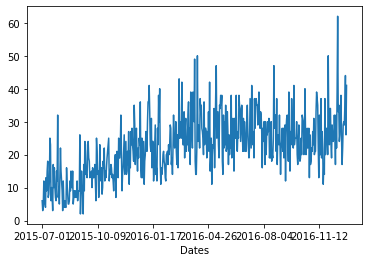

In [4]:
print(train_1_reduce['ASCII_zh.wikipedia.org_all-access_spider'].describe())
train_1_reduce['ASCII_zh.wikipedia.org_all-access_spider'].plot()

<h2>Modèles ARIMA</h2>

In [58]:
# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from sklearn.metrics import mean_squared_error

In [60]:
train = train_1_reduce[:500]
test = train_1_reduce[500:550]

In [61]:
train.head()

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider
Dates,,,,,,,,,,
2015-07-01,18.0,11.0,1.0,35.0,0.0,12.0,0.0,118.0,5.0,6.0
2015-07-02,11.0,14.0,0.0,13.0,0.0,7.0,0.0,26.0,23.0,3.0
2015-07-03,5.0,15.0,1.0,10.0,0.0,4.0,0.0,30.0,14.0,5.0
2015-07-04,13.0,18.0,1.0,94.0,0.0,5.0,0.0,24.0,12.0,12.0
2015-07-05,14.0,11.0,0.0,4.0,0.0,20.0,0.0,29.0,9.0,6.0


In [62]:
model = pm.auto_arima(train['ASCII_zh.wikipedia.org_all-access_spider'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3351.223, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4580.680, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3582.680, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4180.038, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3347.633, Time=0.36 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3482.356, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3349.450, Time=0.36 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3355.223, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3347.918, Time=0.27 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3442.766, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=3351.316, Time=0.58 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3347.317, Time=0.78 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3350.781, Time=0.50 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3429.242, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept

In [66]:
preds, conf = model.predict(n_periods=test.shape[0], return_conf_int=True) # renvoie prédiction et intervalles de confiances
print(preds)
predictions = pd.DataFrame(preds, index = test.index)
print(predictions)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test['ASCII_zh.wikipedia.org_all-access_spider'], preds)))

[23.62241657 24.83199207 24.95900547 24.96153911 24.94978394 24.93641319
 24.92288435 24.90936501 24.89587436 24.88241455 24.86898577 24.85558797
 24.84222109 24.82888505 24.81557978 24.80230522 24.78906128 24.77584791
 24.76266503 24.74951256 24.73639045 24.72329861 24.71023698 24.69720549
 24.68420407 24.67123266 24.65829117 24.64537955 24.63249772 24.61964561
 24.60682316 24.5940303  24.58126695 24.56853306 24.55582855 24.54315336
 24.53050742 24.51789065 24.505303   24.49274439 24.48021477 24.46771405
 24.45524218 24.44279909 24.43038471 24.41799898 24.40564182 24.39331319
 24.38101299 24.36874119]
                    0
Dates                
2016-11-12  23.622417
2016-11-13  24.831992
2016-11-14  24.959005
2016-11-15  24.961539
2016-11-16  24.949784
2016-11-17  24.936413
2016-11-18  24.922884
2016-11-19  24.909365
2016-11-20  24.895874
2016-11-21  24.882415
2016-11-22  24.868986
2016-11-23  24.855588
2016-11-24  24.842221
2016-11-25  24.828885
2016-11-26  24.815580
2016-11-27  24.8

In [ ]:
# Accuracy metrics
'''def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)'''

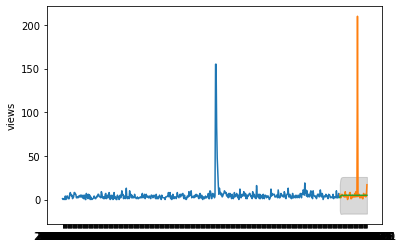

In [70]:
#plot the predictions for validation set
plt.plot(train['ASCII_zh.wikipedia.org_all-access_spider'], label='Train')
plt.plot(test['ASCII_zh.wikipedia.org_all-access_spider'], label='Valid')
plt.plot(predictions, label='Prediction')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.ylabel('views')
plt.show()

<h2>Modèles de boosting</h2>

<h3>XGBoost</h3>

In [5]:
import xgboost as xgb

In [6]:
df = pd.DataFrame(train_1_reduce['ASCII_zh.wikipedia.org_all-access_spider'])
df

,ASCII_zh.wikipedia.org_all-access_spider
Dates,
2015-07-01,6.0
2015-07-02,3.0
2015-07-03,5.0
2015-07-04,12.0
2015-07-05,6.0
...,...
2016-12-27,29.0
2016-12-28,35.0
2016-12-29,44.0


In [7]:
lag = 8
for i in range(lag):
    print(i)
    df['diff' + str(i+1)] = 0
    df['diff' + str(i+1)] = df['ASCII_zh.wikipedia.org_all-access_spider'].diff(i+1)
print(df)

0
1
2
3
4
5
6
7
            ASCII_zh.wikipedia.org_all-access_spider  diff1  diff2  diff3  \
Dates                                                                       
2015-07-01                                       6.0    NaN    NaN    NaN   
2015-07-02                                       3.0   -3.0    NaN    NaN   
2015-07-03                                       5.0    2.0   -1.0    NaN   
2015-07-04                                      12.0    7.0    9.0    6.0   
2015-07-05                                       6.0   -6.0    1.0    3.0   
...                                              ...    ...    ...    ...   
2016-12-27                                      29.0   -1.0    0.0    7.0   
2016-12-28                                      35.0    6.0    5.0    6.0   
2016-12-29                                      44.0    9.0   15.0   14.0   
2016-12-30                                      26.0  -18.0   -9.0   -3.0   
2016-12-31                                      41.0   15.0 

In [12]:
X = df.iloc[:,1:9]
Y = df.iloc[:,0]
X

,diff1,diff2,diff3,diff4,diff5,diff6,diff7,diff8
Dates,,,,,,,,
2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,2.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,7.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN
2015-07-05,-6.0,1.0,3.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2016-12-27,-1.0,0.0,7.0,12.0,4.0,-9.0,-4.0,3.0
2016-12-28,6.0,5.0,6.0,13.0,18.0,10.0,-3.0,2.0
2016-12-29,9.0,15.0,14.0,15.0,22.0,27.0,19.0,6.0


In [52]:
Xtrain = X[0:500]
Xtest = X[500:550]
Ytrain = Y[0:500]
Ytest = Y[500:550]

In [27]:
Xtest.shape

(50, 8)

In [30]:
dtrain = xgb.DMatrix(Xtrain, label=Ytrain)
dtest = xgb.DMatrix(Xtest, label=Ytest)

In [39]:
param = {'max_depth':2, 'eta':1, 'objective=reg' :' tweedie'}
num_round = 2
bst = xgb.train(param, dtrain, num_round)

[18:08:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { objective=reg } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [49]:
preds = bst.predict(dtest)
len(preds)

50

In [55]:
dfPredictions = pd.DataFrame(Ytest)
dfPredictions['predictions'] = preds
dfPredictions.head()

,ASCII_zh.wikipedia.org_all-access_spider,predictions
Dates,,
2016-11-12,32.0,23.925369
2016-11-13,20.0,15.574797
2016-11-14,20.0,15.574797
2016-11-15,37.0,18.922379
2016-11-16,19.0,15.574797


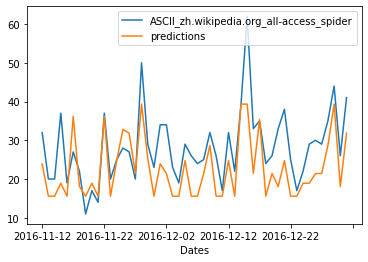

In [56]:
dfPredictions.plot()

In [59]:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(dfPredictions['ASCII_zh.wikipedia.org_all-access_spider'], dfPredictions['predictions'])))

Test RMSE: 8.066


<h2>Prophète</h2>